In [142]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [143]:
w = 3 #frequency

In [144]:
T = np.linspace(0,np.pi,1000) 

In [145]:
h = (t[-1]-t[0])/1000  #h is the step size
N = len(T)

In [146]:
#Here are the equations for spin trajectory

#Mx' = -w*My+u(t)*Mz
#My' = w*Mx
#Mz' = -u(t)*Mx

#w=3

#M(0) = (0,0,1) initial state

In [147]:
#Now we are defining Mx,My,Mz as arrays
Mx    = np.zeros((N,1))
My    = np.zeros((N,1))
Mz    = np.zeros((N,1))

In [148]:
#Mx1,My1,Mz1 are functions , 
#which will return coupled equations for components
#of spin magnetization vector

In [149]:
def Mx1(t,Mx,My,Mz):
    return -3*My -np.cos(3*t)*Mz

In [150]:
def My1(t,Mx,My,Mz):
    return 3*Mx

In [151]:
def Mz1(t,Mx,My,Mz):
    return np.cos(3*t)*Mx

In [152]:
#Adding the initial condition M(0) = (0,0,1)

In [153]:
Mx[0],My[0],Mz[0] = 0,0,1

In [154]:
#Now defining the function for 4th order runge kutta method

In [180]:
def RK4_3(fx,fy,fz,Cx,Cy,Cz,t):
    for i in range(N-1):
    
        K1 = h * fx( t[i] , Cx[i], Cy[i] ,  Cz[i]);
        L1 = h * fy( t[i], Cx[i] ,  Cy[i] , Cz[i]);
        M1 = h * fz( t[i] , Cx[i], Cy[i] , Cz[i]);
    
        K2 = h*fx(t[i]+1/2*h,Cx[i]+1/2*K1 ,Cy[i]+1/2*L1,Cz[i]+1/2*M1);
        L2 = h*fy(t[i]+1/2*h,Cx[i]+1/2*K1 ,Cy[i]+1/2*L1,Cz[i]+1/2*M1);
        M2 = h*fz(t[i]+1/2*h,Cx[i]+1/2*K1 ,Cy[i]+1/2*L1,Cz[i]+1/2*M1);

        K3 = h *fx(t[i]+1/2*h,Cx[i]+1/2*K2,Cy[i]+1/2*L2,Cz[i]+1/2*M2);
        L3 = h *fy(t[i]+1/2*h,Cx[i]+1/2*K2,Cy[i]+1/2*L2,Cz[i]+1/2*M2);
        M3 = h *fz(t[i]+1/2*h,Cx[i]+1/2*K2,Cy[i]+1/2*L2,Cz[i]+1/2*M2);

        K4 = h * fx( t[i]+h ,  Cx[i]+K3, Cy[i]+L3,Cz[i]+M3);
        L4 = h * fy( t[i]+h ,  Cx[i]+K3 , Cy[i]+L3, Cz[i]+M3);
        M4 = h * fz( t[i]+h ,  Cx[i]+K3 , Cy[i]+L3, Cz[i]+M3);

        Cx[i+1] = Cx[i]+1/6*(K1+2*K2+2*K3+K4);                                                                             
        Cy[i+1] = Cy[i]+1/6*(L1+2*L2+2*L3+L4);
        Cz[i+1] = Cz[i]+1/6*(M1+2*M2+2*M3+M4);	
        
    return Cx,Cy,Cz

In [181]:
Mx,My,Mz = RK4_3(Mx1,My1,Mz1,Mx,My,Mz,T)

In [182]:
Mxx= np.linspace(0,np.pi,1000)
Myy,Mzz = np.linspace(0,np.pi,1000),np.linspace(0,np.pi,1000)

In [183]:
for i in range(len(Mx)):
    Mxx[i] = Mx[i][0]
    Myy[i] = My[i][0]
    Mzz[i] = Mz[i][0]

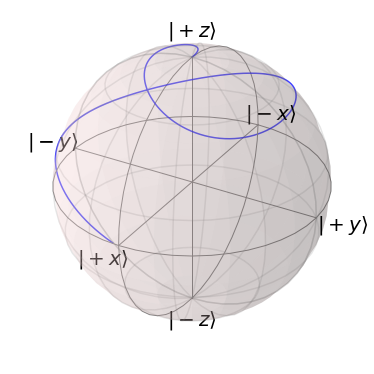

In [184]:
B = Bloch()

B.add_points([Mxx,Myy,Mzz], meth = 'l') # adding points for spin trajectory



B.zlabel = ['$\\left|+z\\right>$','$\\left|-z\\right>$']
B.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
B.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']

B.show()

In [160]:
#Now let's solve equations for Spring
#Here are the equations for spring

# x'(t) = -wy(t) -cos(3t)
# y'(t) = w*x(t)





In [161]:
#Ox1,Oy1 are functions , which will return coupled equations for oscillator

In [162]:
def Ox1(t,x,y):
    return -w*y-np.cos(3*t)

In [163]:
def Oy1(t,x,y):
    return w*x



In [164]:
x    = np.zeros((N,1))
y    = np.zeros((N,1))

In [165]:
x[0],y[0] = 0,0  #adding the initial condition (x,y)=(0,0)


In [166]:
#Now defining the RK4 for two coupled equations

def RK4_2(fx,fy,Cx,Cy,t):
    for i in range(N-1):
        K1     = h * fx( t[i]          , Cx[i]        , Cy[i] );
        L1     = h * fy( t[i]          , Cx[i]       ,  Cy[i]);
        
    
        K2     = h * fx(t[i] + 1/2*h,  Cx[i]+1/2*K1 , Cy[i]+1/2*L1);
        L2     = h * fy(t[i] + 1/2*h,  Cx[i]+1/2*K1 , Cy[i]+1/2*L1 );
        

        K3     = h * fx(t[i] + 1/2*h,  Cx[i] + 1/2*K2 , Cy[i] + 1/2*L2);
        L3     = h * fy(t[i] + 1/2*h,  Cx[i] + 1/2*K2 , Cy[i] + 1/2*L2);
       

        K4     = h * fx( t[i]+h    ,  Cx[i]+K3     , Cy[i]+L3);
        L4     = h * fy( t[i]+h    ,  Cx[i]+K3     , Cy[i]+L3);
       

        Cx[i+1] = Cx[i]+1/6*(K1+2*K2+2*K3+K4);                                                                             
        Cy[i+1] = Cy[i]+1/6*(L1+2*L2+2*L3+L4);
       
        
    return Cx,Cy

In [167]:
x,y = RK4_2(Ox1,Oy1,x,y,T)

In [168]:
xx = np.linspace(0,np.pi,1000)
yy,zz=np.linspace(0,np.pi,1000),np.linspace(0,np.pi,1000)


In [169]:
for i in range(len(Mx)):
    xx[i] = x[i][0]
    yy[i] = y[i][0]
    zz[i] = 0

/home/hackuter/anaconda3/lib/python3.8/site-packages/qutip/bloch.py:587: RuntimeWarning: divide by zero encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/hackuter/anaconda3/lib/python3.8/site-packages/qutip/bloch.py:587: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/hackuter/anaconda3/lib/python3.8/site-packages/qutip/bloch.py:587: RuntimeWarning: invalid value encountered in greater
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):


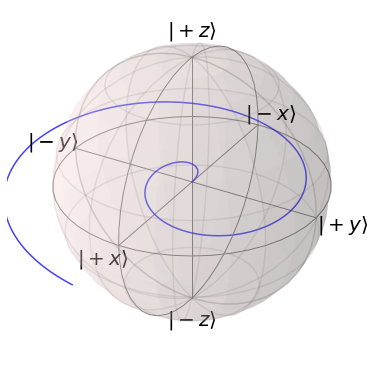

In [170]:
B = Bloch()

B.add_points([xx,yy,zz], meth = 'l')   # adding points for spin trajectory
B.zlabel = ['$\\left|+z\\right>$','$\\left|-z\\right>$']
B.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
B.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']

B.show()

/home/hackuter/anaconda3/lib/python3.8/site-packages/qutip/bloch.py:587: RuntimeWarning: divide by zero encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/hackuter/anaconda3/lib/python3.8/site-packages/qutip/bloch.py:587: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/hackuter/anaconda3/lib/python3.8/site-packages/qutip/bloch.py:587: RuntimeWarning: invalid value encountered in greater
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):


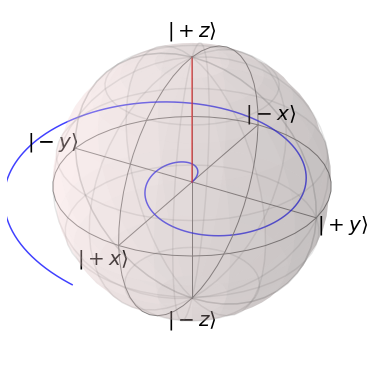

In [171]:
B = Bloch()

B.add_points([xx,yy,zz], meth = 'l')   

B.add_points([Mxx,Myy,Mzz], meth = 'l') 

B.zlabel = ['$\\left|+z\\right>$','$\\left|-z\\right>$']
B.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
B.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']

B.show()

In [172]:
#simulation part

In [ ]:

fig = figure()
axes = Axes3D(fig,azim=-40,elev=30)
B = Bloch(axes=axes)
B.zlabel = ['$\\left|+z\\right>$','$\\left|-z\\right>$']
B.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
B.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']
def simulate(i):
    B.clear()
    B.add_vectors([Mxx[i],Myy[i],Mzz[i]])
    B.add_points([Mxx[:i+1],Myy[:i+1],Mzz[:i+1]])
    B.make_sphere()
    return axes

def init():
    B.vector_color = ['g']
    return axes

simulation = animation.FuncAnimation(fig, simulate, np.arange(len(Mxx)))
simulation.save('simulation.mp4', fps=60)

